# Analysing Sentiment without Location

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
df = pd.read_csv('../Data/sentiments_nogeo.csv')

In [3]:
df.head(3)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral,sentiment
0,0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...",wa beautiful visit coton manor northamptonshir...,0.6808,0.215,0.087,0.698,positive
1,1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",u map heating global warming real thing know c...,0.4767,0.227,0.000,0.773,positive
2,2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",hedgeaz n new hedge much say possibly another ...,0.8724,0.296,0.000,0.704,positive


In [4]:
#extracting hashtags
df['hashtags'] = df['content'].str.findall(r'\#(\w*)').apply(', '.join)

In [5]:
df.head(3)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral,sentiment,hashtags
0,0,1394326695260393473,2021-05-17 16:19:24+00:00,"It was a beautiful visit to Coton Manor, in No...",NaN,NaN,"{'username': 'fransherbourne', 'displayname': ...",wa beautiful visit coton manor northamptonshir...,0.6808,0.215,0.087,0.698,positive,
1,1,1394326567174672391,2021-05-17 16:18:53+00:00,A 🇺🇸 U.S. map heating up from 1991 to 2020.\n\...,NaN,NaN,"{'username': 'Jean_Is_fed_up', 'displayname': ...",u map heating global warming real thing know c...,0.4767,0.227,0.000,0.773,positive,"DemVoice1, wtpEARTH, wtpBLUE, wtpEDU, ONEV1"
2,2,1394326500804120581,2021-05-17 16:18:37+00:00,#HedgeAZ\nN is for NEW hedges! \nSo much to sa...,NaN,NaN,"{'username': 'FavColour_Green', 'displayname':...",hedgeaz n new hedge much say possibly another ...,0.8724,0.296,0.000,0.704,positive,HedgeAZ


In [6]:
#most popular hashtags
hashtags_popular = df.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)
#most popular mentions
mentions_popular = df.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

In [7]:
def generate_wordcloud(x):
    word_cloud = WordCloud(width=1000,height=1000, random_state=21, max_font_size=200, colormap='BuGn', background_color=
                      'white').generate_from_frequencies(x)
    plt.figure(figsize=(10,9),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

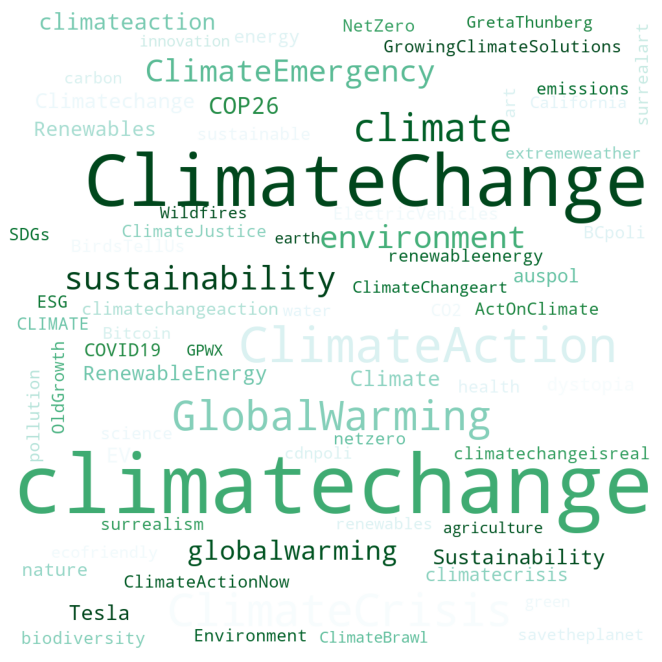

In [8]:
generate_wordcloud(hashtags_popular)

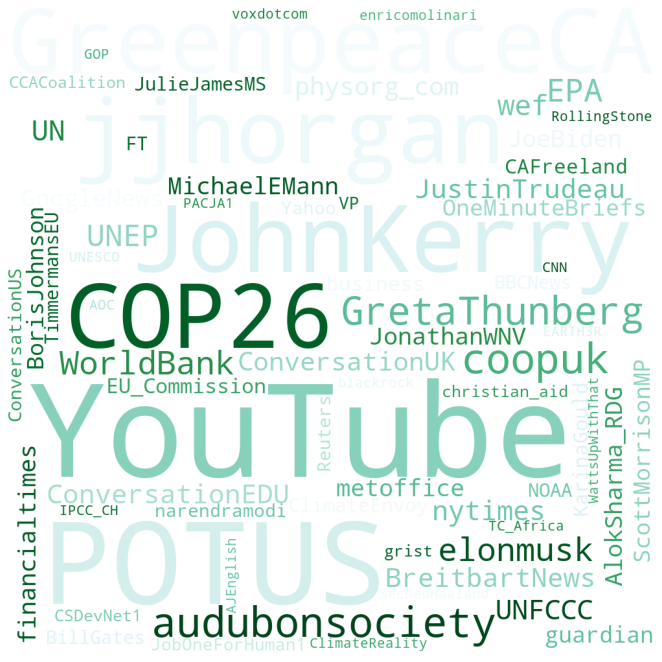

In [9]:
generate_wordcloud(mentions_popular)

**Most Common Words**

In [10]:
import nltk 

reviews = ''

for review in df['content_clean']:
    reviews += review

corpus = nltk.sent_tokenize(reviews)

In [11]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [12]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys())]

In [13]:
corpus.sort(reverse = True)
corpus

[(76002, 'climate'),
 (66055, 'change'),
 (19072, 'climatechange'),
 (16141, 'global'),
 (12168, 'warming'),
 (7708, 'u'),
 (7479, 'ha'),
 (5950, 'new'),
 (5844, 'people'),
 (5615, 'world'),
 (5290, 'need'),
 (4831, 'year'),
 (4433, 'like'),
 (4409, 'help'),
 (4278, 'carbon'),
 (4131, 'action'),
 (4085, 'impact'),
 (4070, 'may'),
 (3996, 'one'),
 (3800, 'emission'),
 (3770, 'wa'),
 (3726, 'energy'),
 (3598, 'make'),
 (3542, 'environment'),
 (3538, 'time'),
 (3356, 'could'),
 (3322, 'climateaction'),
 (3227, 'get'),
 (3204, 'take'),
 (3066, 'future'),
 (3010, 'say'),
 (2972, 'real'),
 (2930, 'climatecrisis'),
 (2862, 'way'),
 (2698, 'globalwarming'),
 (2679, 'water'),
 (2657, 'day'),
 (2634, 'want'),
 (2631, 'human'),
 (2576, 'sustainability'),
 (2515, 'issue'),
 (2513, 'green'),
 (2495, 'think'),
 (2436, 'earth'),
 (2431, 'planet'),
 (2416, 'health'),
 (2400, 'solution'),
 (2393, 'thing'),
 (2392, 'country'),
 (2378, 'would'),
 (2334, 'food'),
 (2332, 'science'),
 (2267, 'see'),
 (2266

In [14]:
word_freq = pd.DataFrame(corpus).rename(columns={'0': 'count', '1': 'word'}).rename(columns={0: 'count', 1: 'word'})

In [15]:
word_freq[word_freq['count']> 300]

,count,word
0,76002,climate
1,66055,change
2,19072,climatechange
3,16141,global
4,12168,warming
...,...,...
860,301,true
861,301,started
862,301,often
863,301,mother


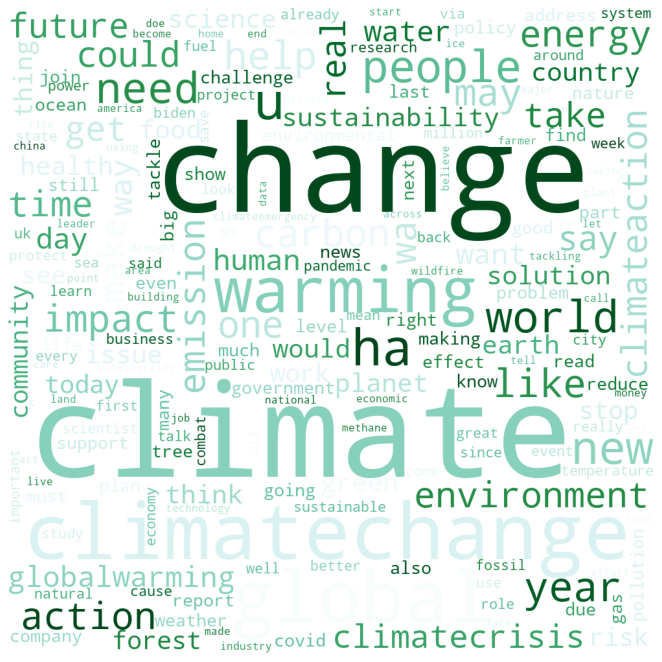

In [17]:
generate_wordcloud(wordfreq)

**Negative Sentiment Hashtags**

In [18]:
df_neg = df[df['negative'] > 0.3]

In [19]:
df_neg.head(2)

,Unnamed: 0,id,date,content,coordinates,place,user,content_clean,comp,positive,negative,neutral,sentiment,hashtags
6,6,1394326370692616193,2021-05-17 16:18:06+00:00,Climate change optimism should be dead. Show u...,NaN,NaN,"{'username': 'Spencer_Berg_', 'displayname': '...",climate change optimism dead show blow bitch,-0.6808,0.224,0.519,0.256,negative,
11,11,1394326159408594948,2021-05-17 16:17:16+00:00,"Of all the stupidest wastes of money, #sacrame...",NaN,NaN,"{'username': 'Soldier4_Truth', 'displayname': ...",stupidest waste money sacramentocapitolseconne...,-0.8442,0.000,0.394,0.606,negative,"sacramentocapitolSEconnectorxpress, climatecha..."


In [20]:
#Popular negative hashtags
hashtags_popular_neg = df_neg.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

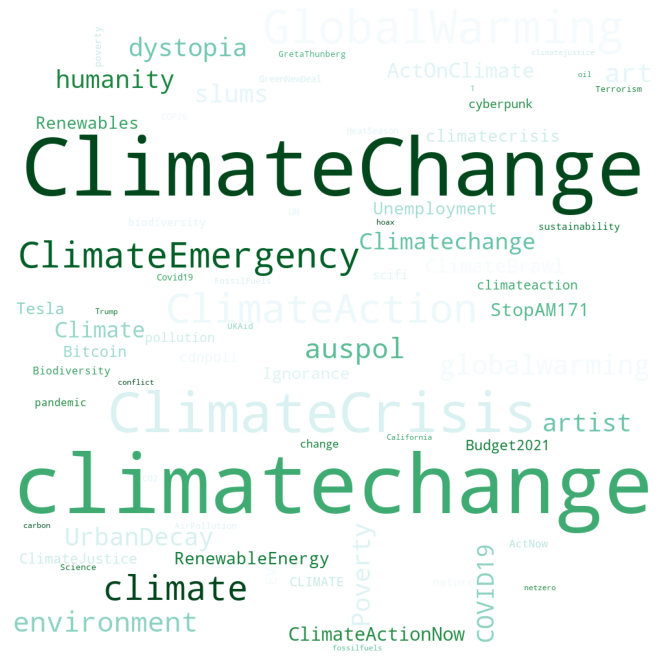

In [21]:
generate_wordcloud(hashtags_popular_neg)

**Positive Sentiment Hashtags**

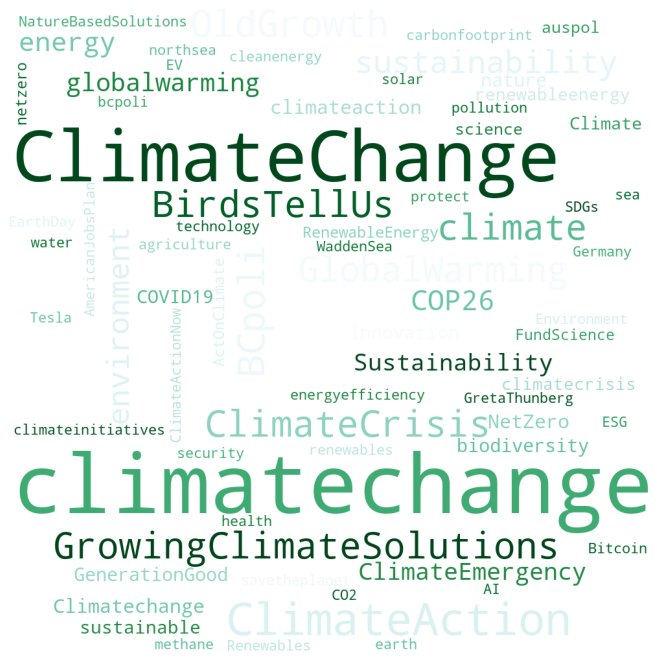

In [22]:
df_pos = df[df['positive'] > 0.3]

hashtags_popular_pos = df_pos.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

generate_wordcloud(hashtags_popular_pos)

**Mentions Negative Sentiment**

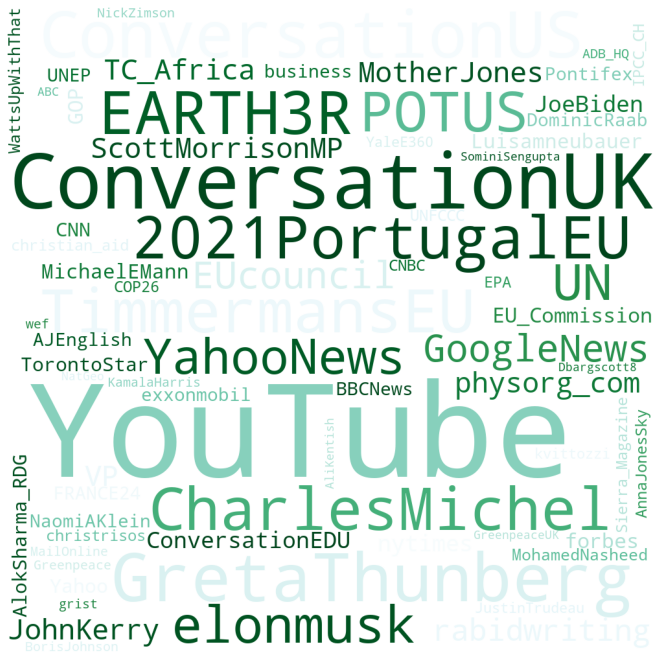

In [23]:
mentions_popular_neg = df_neg.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)
generate_wordcloud(mentions_popular_neg)

**Mentions Positive Sentiment**

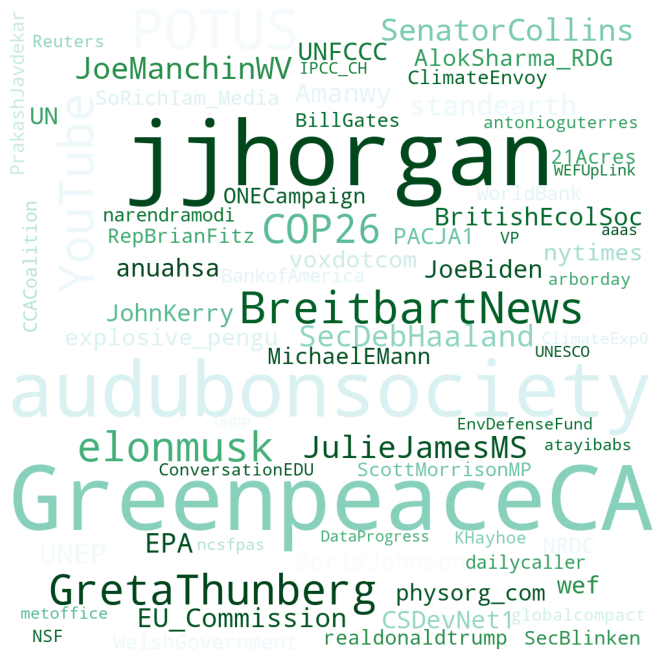

In [24]:
mentions_popular_pos = df_pos.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)
generate_wordcloud(mentions_popular_pos)